# **Project Name**    - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Our client is an Insuarance company that provides health Isuarance to its customers. The client wants us to predict whether the existing holders will will be intrested for vehicle insuarance or not. The client gave us the dataset which has the columns like:- Age, Driving license, previously insured, Vehicle damage,Vehicle age, Annual premium, Vintage, etc. In this project we will go through the data, deal with null and duplicate values, perform EDA and we will find key insights from the data by data visualization. The next step will be pre processing the data and perform feature enginnering and feature selection, handle class imbalance and then we will fit various Machine learning model to get best possible Machine learning model that will predict whether the customer is intrested in vehicle insuarance or not

# **GitHub Link -**

https://github.com/umerulla

# **Problem Statement**


This is an Classification project in which the dataset has information on the insuarance, vehicle details and some customer information by which we have to predict whether the customer is intrested in vehicle insuarance or not. We will analyze the data, find key insights by visualization and fit the best possible model for prediction

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_1samp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data Science/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print('Total dupliactes in the data are',len(df[df.duplicated()]))

Total dupliactes in the data are 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no null values present

### What did you know about your dataset?

In this dataset we have information on Customer's gender,age,driving license, region code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage and Response. We found out that there are no null values present and even there are no duplicates present out of 381109 observations. There are 3 columns with object as its datatype and rest all the columns have integrer and float as their datatype. further we will change the categorical observations into numerical data and perform the rest of the work to predict the outcome

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

* id- indicates the unique id of the customer
* Gender- States the gender of the customer
* Age- States the age of the customer
* Driving_License- States whether the customer has license or no( 0 means he has no license, 1 means he has license)
* Region_Code- States the region code of the customer
* Previously_Insured- States whether the customer have previously insured or no ( 0 means no insured, 1 means insured)
* Vehicle_Age- States the age of the vehicle
* Vehicle_Damage- States whether the customer have done any damage to the vehicle or no
* Annual_Premium- Sum of the money the customers pays regularly for this guarantee
* Policy_Sales_Channel- States the channel number of the sales (diffrent channels to reach out the customers)
* Vintage- States the number of days the customer is associated with the company
* Response- States if the customer is intrested or not(0 means he is not intrested, 1 means he is intrested)

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print(df.apply(lambda x : x.unique()))

id                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                     [Male, Female]
Age                     [44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...
Driving_License                                                    [1, 0]
Region_Code             [28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...
Previously_Insured                                                 [0, 1]
Vehicle_Age                               [> 2 Years, 1-2 Year, < 1 Year]
Vehicle_Damage                                                  [Yes, No]
Annual_Premium          [40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...
Policy_Sales_Channel    [26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...
Vintage                 [217, 183, 27, 203, 39, 176, 249, 72, 28, 80, ...
Response                                                           [1, 0]
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Changing the observation of the features from categorical to numerical values
df['Driving_License'] = df['Driving_License'].apply(lambda x : 'Yes' if x == 1 else 'No')
df['Previously_Insured'] = df['Previously_Insured'].apply(lambda x : 'Yes' if x == 1 else 'No')

In [13]:
# Dropping the id column
df.drop('id', axis = 1, inplace = True)

### What all manipulations have you done and insights you found?

* Firstly I changed the categorical column to numerical values.
* Dropped the Id column beccause it will make no sense to build Machine learning model.
* There were no null and duplicate values present in this dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

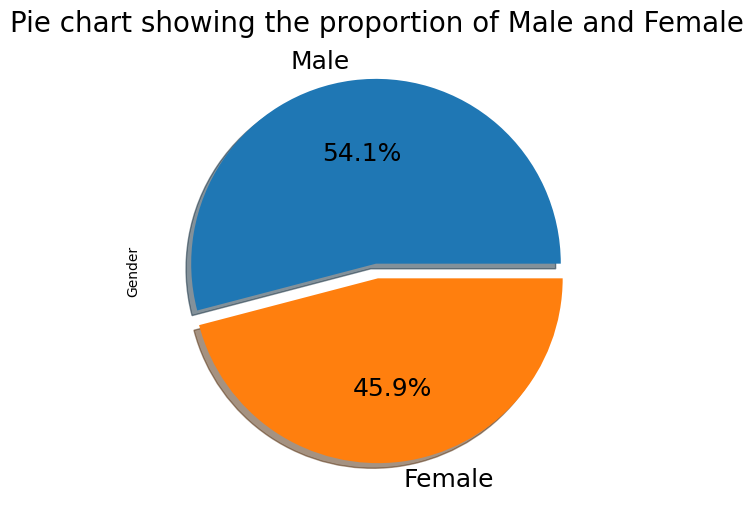

Male      206089
Female    175020
Name: Gender, dtype: int64


In [14]:
# Chart - 1 visualization code
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (8,6), fontsize= 18, explode = [0.04,0.04], shadow = True)
plt.title('Pie chart showing the proportion of Male and Female',fontsize = 20)

plt.show()

# prining the actual values
print(df['Gender'].value_counts())

##### 1. Why did you pick the specific chart?

Pie chart helps us to compare two variable as a whole

##### 2. What is/are the insight(s) found from the chart?

There are around 54.1% male present in the given data

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are less number of females in the given data. The company needs to focus targetting female customers

#### Chart - 2

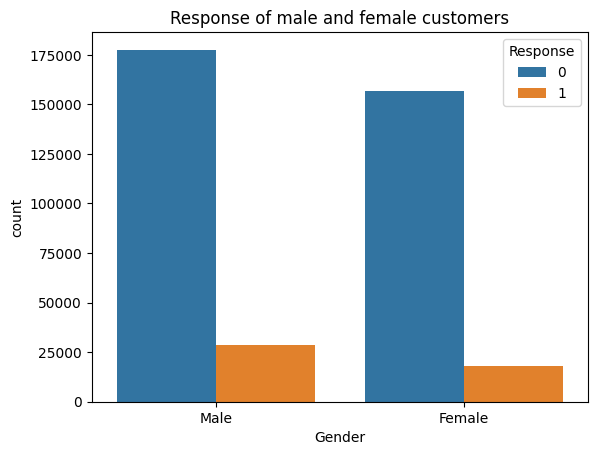

Male      206089
Female    175020
Name: Gender, dtype: int64


In [15]:
# Chart - 2 visualization code
sns.countplot(x = 'Gender' , data = df , hue = 'Response')
plt.title('Response of male and female customers')
plt.show()
# prining the actual values
print(df['Gender'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps to compare the male and female customers along with their response

##### 2. What is/are the insight(s) found from the chart?

The response from male customers is high than female customers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company should focus on targetting female customers as the response from female customers are low compared to male customers

#### Chart - 3

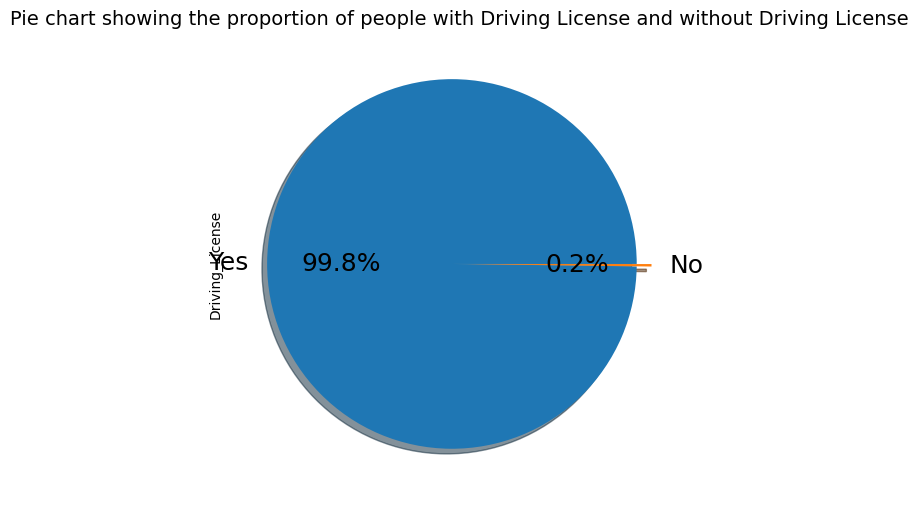

Yes    380297
No        812
Name: Driving_License, dtype: int64


In [16]:
# Chart - 3 visualization code
df['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (8,6), fontsize= 18, explode = [0.04,0.04], shadow = True)

plt.title('Pie chart showing the proportion of people with Driving License and without Driving License',fontsize = 14)
plt.show()

# prining the actual values
print(df['Driving_License'].value_counts())

##### 1. Why did you pick the specific chart?

Pie chart helps us to compare two variable as a whole

##### 2. What is/are the insight(s) found from the chart?

Around 99.8% of the customers have their driving license

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

99% of its customers have their driving license, so the company have the best possible oppurtunity to sell their vehicle insurance

#### Chart - 4

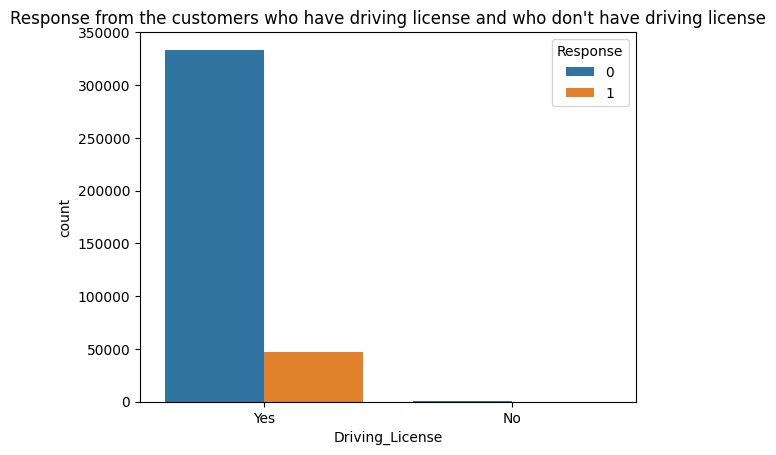

Yes    380297
No        812
Name: Driving_License, dtype: int64


In [17]:
# Chart - 4 visualization code
sns.countplot(x = 'Driving_License' , data = df , hue = 'Response')
plt.title("Response from the customers who have driving license and who don't have driving license")
plt.show()
# prining the actual values
print(df['Driving_License'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps to compare the people with driving and without driving license along with their response



##### 2. What is/are the insight(s) found from the chart?

The people with driving license are the one's who are intrested in buying vehicle insurance

#### Chart - 5

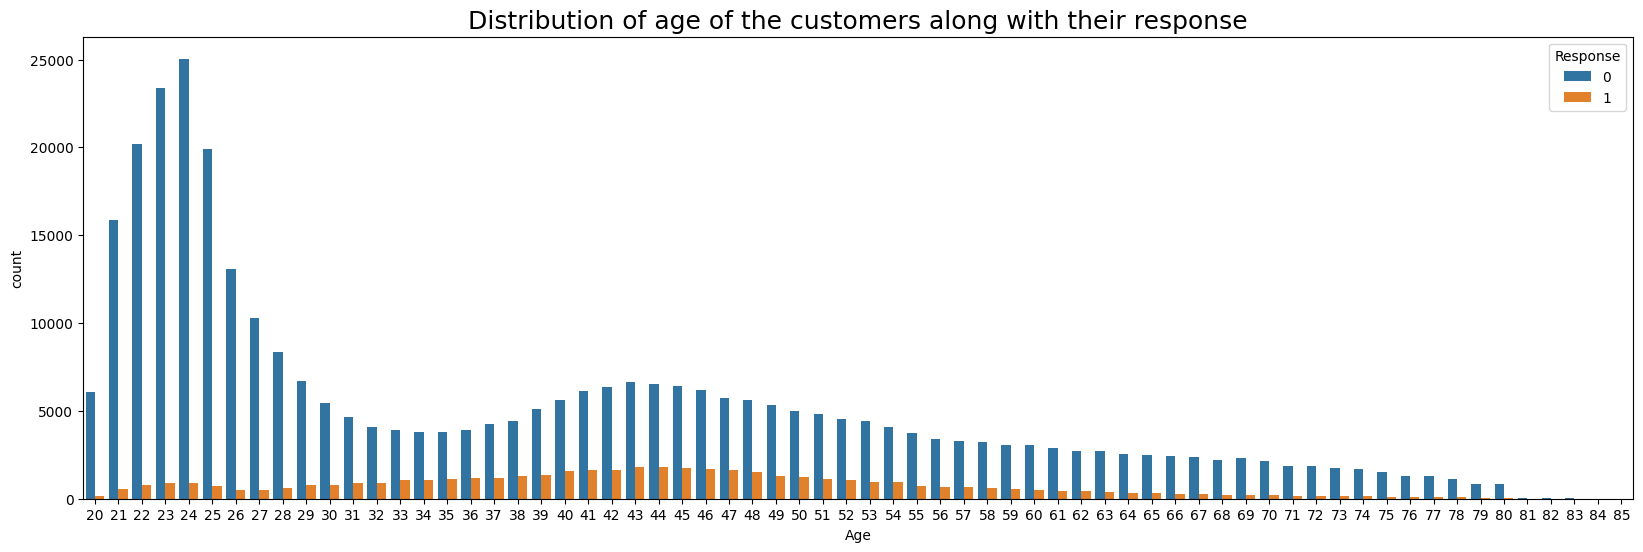

In [18]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(20, 6))
plt.title('Distribution of age of the customers along with their response',fontsize = (18))
sns.countplot(x = 'Age',data = df , hue = 'Response')
fig.show()


##### 1. Why did you pick the specific chart?

subplots helps to compare distribution of age according to their response


##### 2. What is/are the insight(s) found from the chart?

There are lots of customers with age of 20-32

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The customers with age 20-32 have very few response compared to age group of 33-55. The company should focus more on the customers of age group 20-32

#### Chart - 6

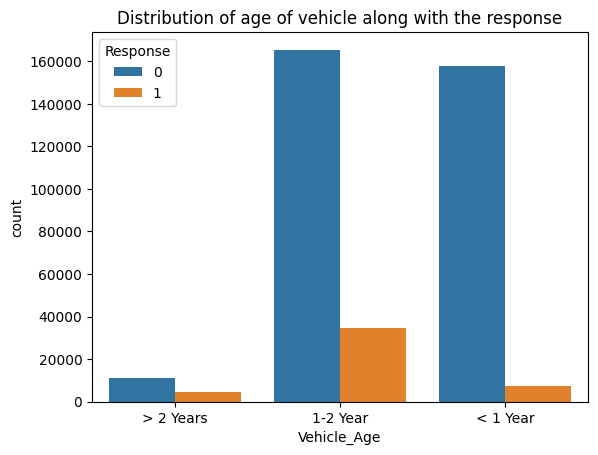

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [19]:
# Chart - 6 visualization code
sns.countplot(x = 'Vehicle_Age' , data = df , hue = 'Response')
plt.title('Distribution of age of vehicle along with the response')
plt.show()
# prining the actual values
print(df['Vehicle_Age'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps to compare the distribution of age of the vehicle along with the response

##### 2. What is/are the insight(s) found from the chart?

* There are most amount of customers with the evhicle age of 1-2 years
* There are very few customers with vehicle age more than 2 years

#### Chart - 7

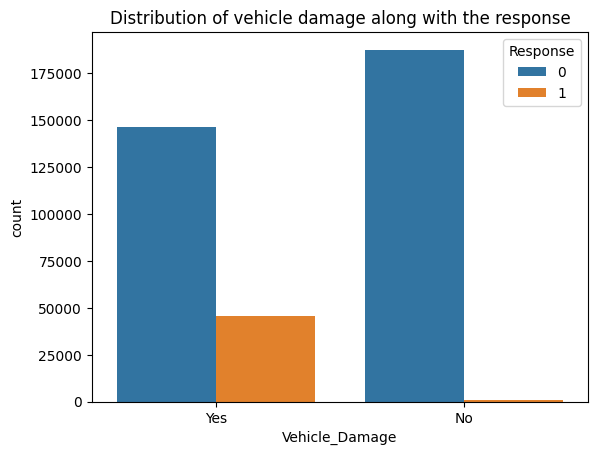

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [20]:
# Chart - 7 visualization code
sns.countplot(x = 'Vehicle_Damage' , data = df , hue = 'Response')
plt.title('Distribution of vehicle damage along with the response')
plt.show()
# prining the actual values
print(df['Vehicle_Damage'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps to compare the distribution of vehicle damage along with the response

##### 2. What is/are the insight(s) found from the chart?

The highest response is from the customers with their vehicle already been damaged

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The least amount of response is from the customers that doesn't have any damage to their vehicle. The company should create awareness among the customers and give them knowledge of vehicle insurance benefits so that the response will increase from this category

#### Chart - 8

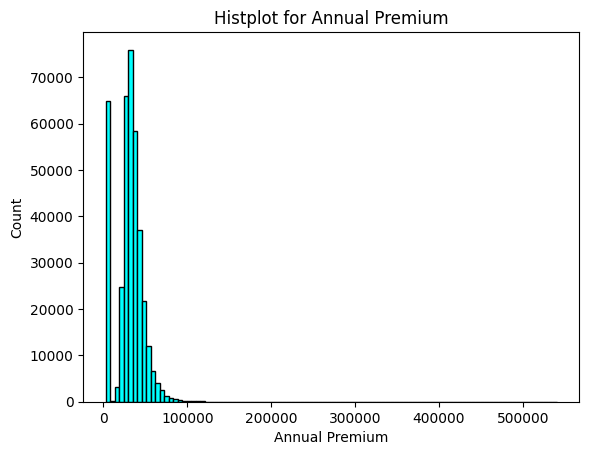

In [21]:
# Chart - 8 visualization code
plt.hist(df['Annual_Premium'], bins = 100, color='cyan', edgecolor = 'black')

plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.title('Histplot for Annual Premium')
plt.show()


##### 1. Why did you pick the specific chart?

Histogram helps to compare the distribution of Annual premium paid

##### 2. What is/are the insight(s) found from the chart?

The maximum number of people pay the anual premium not exceeding 1 lakh rupees

#### Chart - 9

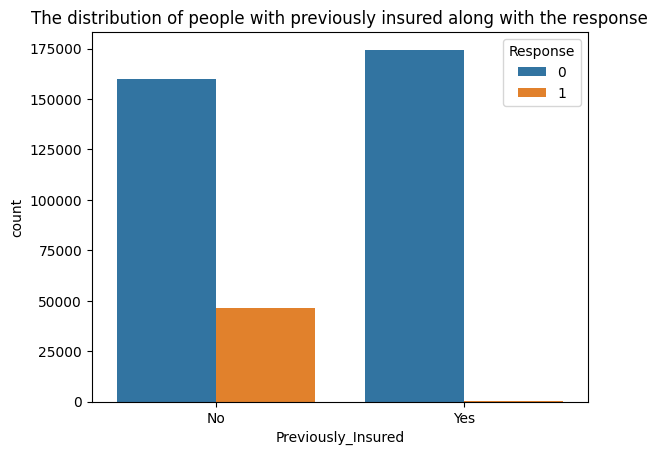

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64


In [22]:
# Chart -9 visualization code
sns.countplot(x = 'Previously_Insured' , data = df , hue = 'Response')
plt.title('The distribution of people with previously insured along with the response')
plt.show()
# prining the actual values
print(df['Previously_Insured'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps us to compare the distribution of people with previously insured along with their response

##### 2. What is/are the insight(s) found from the chart?

The people with not previously insured are intrested in buying insurance

#### Chart - 10

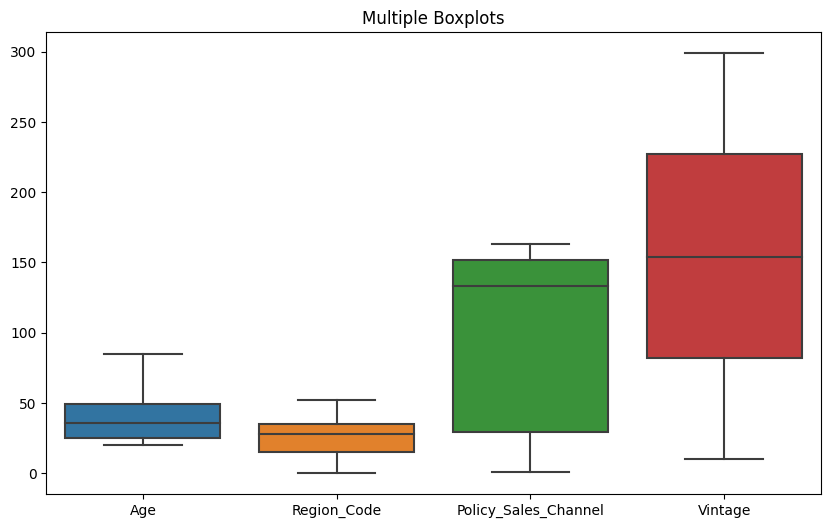

In [23]:
# Chart - 10 visualization code
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df.drop(['Response', 'Annual_Premium'], axis = 1))
plt.title('Multiple Boxplots')
fig.show()

##### 1. Why did you pick the specific chart?

Box plot helps to find the outliers in the data

##### 2. What is/are the insight(s) found from the chart?

There are no outliers present in all the columns except in Annual premium

#### Chart - 11

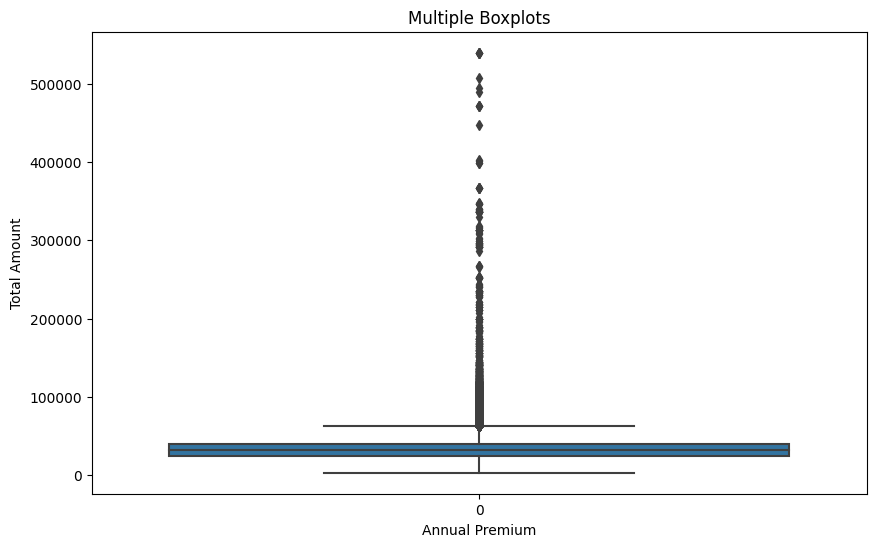

In [24]:
# Chart - 11 visualization code
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df['Annual_Premium'])
plt.xlabel( 'Annual Premium')
plt.ylabel('Total Amount')
plt.title('Multiple Boxplots')
fig.show()

##### 1. Why did you pick the specific chart?

Box plot helps to find the outliers in the data

##### 2. What is/are the insight(s) found from the chart?

There are lot of outliers in the Annual premium column

#### Chart - 12

Text(0.5, 1.0, 'Pair Plot')

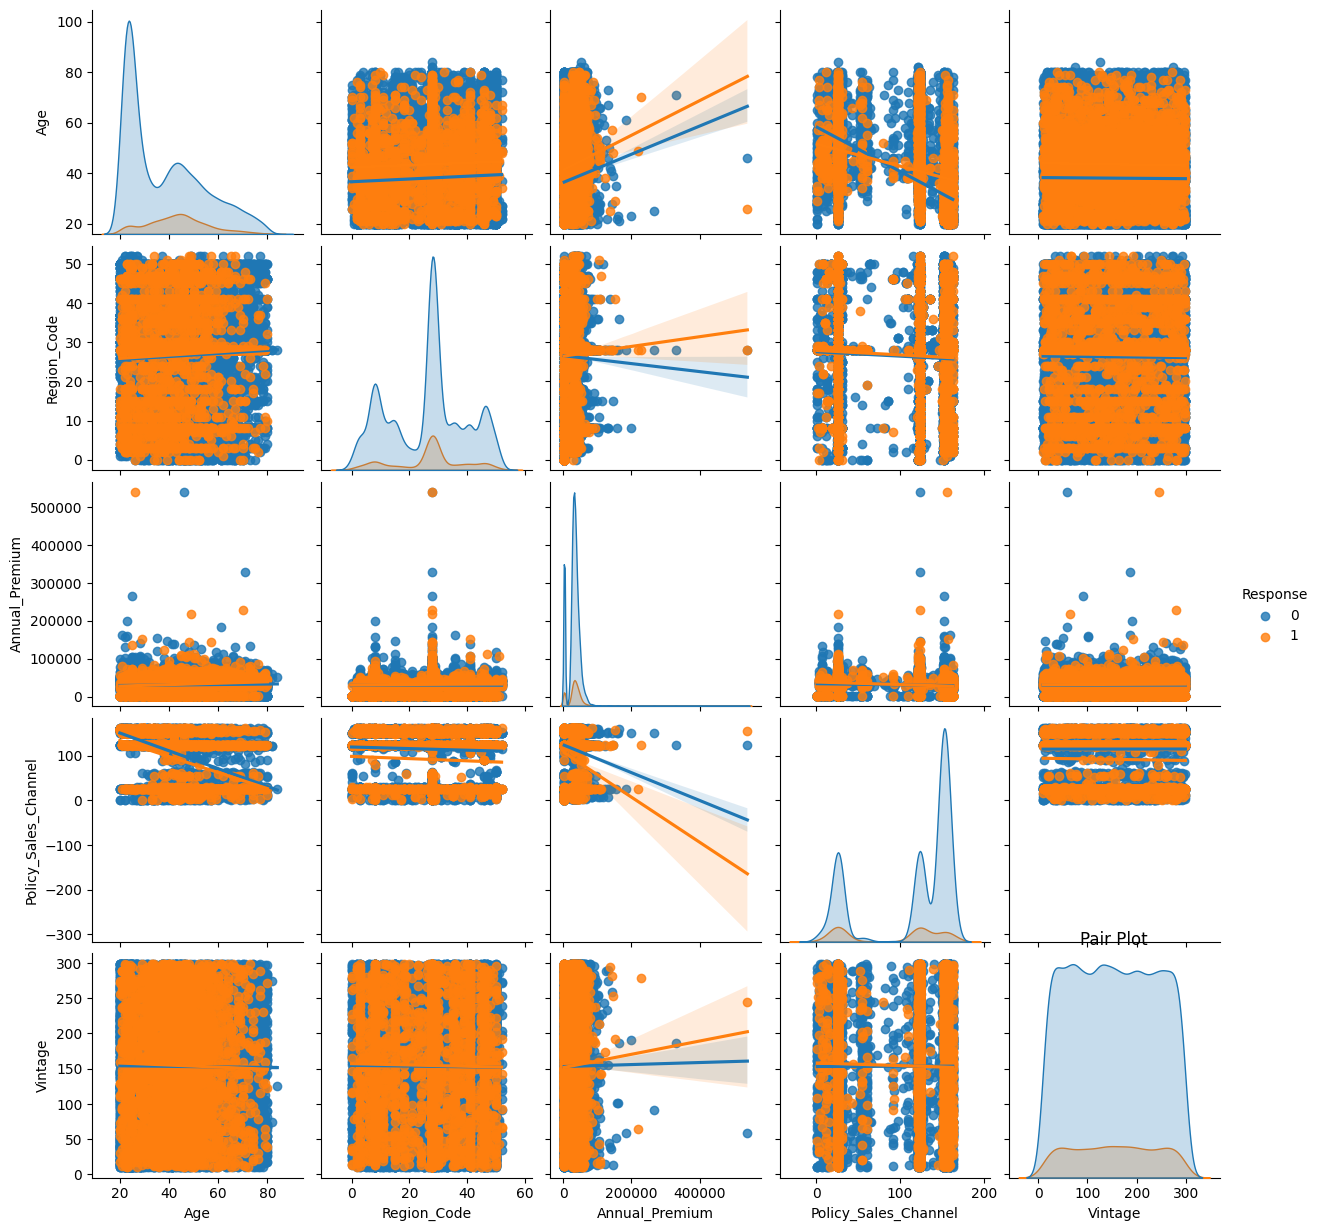

In [25]:
# Chart - 12 visualization code
df_pairplot = df.sample( n= 25000 , random_state = 48)
sns.pairplot(df_pairplot, diag_kind="kde", kind = 'reg', hue = 'Response')

#setting title
plt.title('Pair Plot')

##### 1. Why did you pick the specific chart?

Pair plot helps to compare various variables at once

##### 2. What is/are the insight(s) found from the chart?

* Policy sales channel is negativly corellated to age
* Age and Anual premium is positively correlated

#### Chart - 13 - Correlation Heatmap

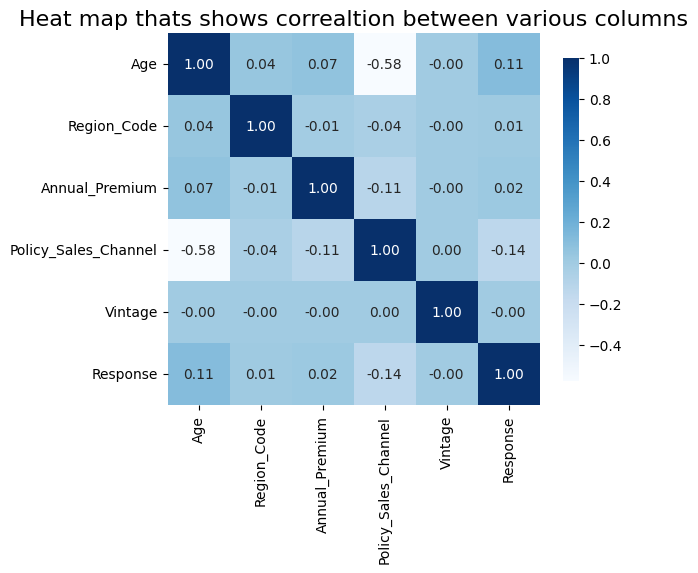

In [26]:
# Correlation Heatmap visualization code
correlation = df.corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', vmax=1, square=True, cmap="Blues",
            cbar_kws={'shrink': 0.7})
ax.set_title('Heat map thats shows correaltion between various columns', fontsize = (16))
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap helps us to know the correaltion between various variable

##### 2. What is/are the insight(s) found from the chart?

* Age and policy channel are negatively correlated
* Vintage has almost zero correlation with all the other variable
* Policy sales channel and Response is negatively correlated
* Age has the highest correlation with the Response when compared to all the variables

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - The average age is less than 32

Alternate Hypothesis(H1) - The average age is more than 32

#### 2. Perform an appropriate statistical test.

In [27]:
# creating a sample from population
sample_age = df['Age'].sample( n= int(len(df['Age'])*0.1),random_state = 48)
sample_age.shape

(38110,)

In [28]:
# Perform Statistical Test to obtain P-Value
t_statistic, p_value = ttest_1samp(sample_age, popmean=32, alternative='greater')
print('The value of t_statistic is ',t_statistic)
print('P value is',p_value)
if p_value < 0.05:
    print('Reject the null hypothesis: Average age is more than 32')
else:
    print('Fail to reject the null hypothesis: Average age is less than or equal to 32')

The value of t_statistic is  85.13448127739508
P value is 0.0
Reject the null hypothesis: Average age is more than 32


##### Which statistical test have you done to obtain P-Value?

I used 1 sample t test

##### Why did you choose the specific statistical test?

I am comparing the population mean with sample mean of the same group

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present

### 2. Handling Outliers

In [30]:
#Creating a function that will remove outliers based on IQR
def remove_outliers(df , colnames):
  q1 = df[colnames].quantile(0.25)
  q3 = df[colnames].quantile(0.75)
  iqr = q3-q1
  loweriqr= q1-1.5*iqr
  higheriqr=q3+1.5*iqr
  def_out = df.loc[(df[colnames] >loweriqr) & (df[colnames] <higheriqr)]
  return def_out

In [31]:
#Applying the outlier removal function to remove the outliers
df = remove_outliers(df,'Annual_Premium')
print (df.shape)

(370789, 11)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the IQR method to handle the outliers because in sales we cannot detect if there is an outlier or no by looking at other columns.. The sales can be high or low and by the customer column. there can be possibility that a customer purchased most amount of good from that store so the sales is high. So I used IQR method to remove outliers

### 3. Categorical Encoding

In [32]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['Gender', 'Vehicle_Age','Previously_Insured','Driving_License', 'Vehicle_Damage'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

I done label Encoding ( Converting categorical data into numeric data) as the data is Ordinal. If the data was Nominal I would have used One Hot Encoding

In [33]:
df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Previously_Insured_No,Previously_Insured_Yes,Driving_License_No,Driving_License_Yes,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,28.0,40454.0,26.0,217,1,0,1,0,0,1,1,0,0,1,0,1
1,76,3.0,33536.0,26.0,183,0,0,1,1,0,0,1,0,0,1,1,0
2,47,28.0,38294.0,26.0,27,1,0,1,0,0,1,1,0,0,1,0,1
3,21,11.0,28619.0,152.0,203,0,0,1,0,1,0,0,1,0,1,1,0
4,29,41.0,27496.0,152.0,39,0,1,0,0,1,0,0,1,0,1,1,0


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [34]:
# Finding Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

#### 2. Feature Selection

In [35]:
# Vizualize the VIF for all variables
cal_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,Age,2.896431
1,Region_Code,1.002725
2,Annual_Premium,1.020975
3,Policy_Sales_Channel,1.603514
4,Vintage,1.000031
5,Gender_Female,inf
6,Gender_Male,inf
7,Vehicle_Age_1-2 Year,inf
8,Vehicle_Age_< 1 Year,inf
9,Vehicle_Age_> 2 Years,inf


##### What all feature selection methods have you used  and why?

All the features are not multicorrealted and does not need to removed

### 5. Handling Imbalanced Dataset

In [36]:
df['Response'].value_counts()

0    325634
1     45155
Name: Response, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

As we can clearly see the observation of class 1 is pretty low than class 0 so the model will not get enough class 1 observation for prediction

In [37]:
# Handling Imbalanced Dataset (If needed)
# Defining the input an output variable for the model
x=df.drop(['Response'],axis=1)
y=df['Response']

smote = SMOTE()  # You can adjust the sampling strategy if needed

# Apply SMOTE to create balanced data
x_balanced, y_balanced = smote.fit_resample(x,y.ravel())

# Verify the new class distribution

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))

After OverSampling, counts of label '1': 325634
After OverSampling, counts of label '0': 325634


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used Smote technique to handle the class imbalance as Smote creates new data points of the minority class using k-nearest Neighbours

### 6. Data Splitting

In [38]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,Y_train,Y_test = train_test_split(x_balanced,y_balanced, test_size=0.2,random_state = 42)

##### What data splitting ratio have you used and why?

I have used 75-25 ratio as the model will get enough training data to learn

## ***7. ML Model Implementation***

### ML Model - 1 (Logistic Regression)

In [39]:
# Fitting the Logistic regression model
Lr = LogisticRegression()
Lr.fit(X_train,Y_train)

# predicting for y test
Lr_Y_predicted = Lr.predict(X_test)

# evaluation of scores
Lr_accuracy = accuracy_score(Y_test, Lr_Y_predicted)
Lr_precision = precision_score(Y_test, Lr_Y_predicted)
Lr_recall = recall_score(Y_test, Lr_Y_predicted)
Lr_f1 = f1_score(Y_test, Lr_Y_predicted)
Lr_conf_matrix = confusion_matrix(Y_test, Lr_Y_predicted)

print("Accuracy:", Lr_accuracy)
print("Precision:", Lr_precision)
print("Recall:", Lr_recall)
print("F1 Score:", Lr_f1)
print("Confusion Matrix:\n", Lr_conf_matrix)

Accuracy: 0.6291169561011563
Precision: 0.6192686016882802
Recall: 0.6685980389143331
F1 Score: 0.6429885821970956
Confusion Matrix:
 [[38442 26746]
 [21563 43503]]


In [40]:
#Comparing the acctual and predicted values
Lr_predicted_df = pd.DataFrame(zip(Y_test,Lr_Y_predicted),columns = ['Actual','Predicted'])
Lr_predicted_df


,Actual,Predicted
0,0,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
130249,1,1
130250,0,1
130251,1,1
130252,0,1


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used Logistic regression model

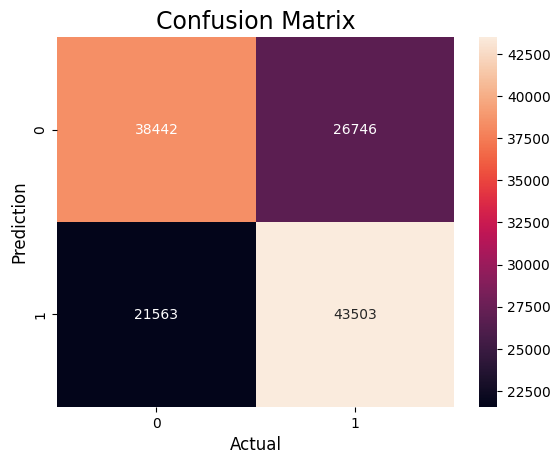

In [41]:
# Vizualizing the Confusion Matrix
actual    = np.array(Y_test)
predicted = np.array(Lr_Y_predicted)

#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)

#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### ML Model - 2 (Decision Tree Classifier)

In [42]:
#Fitting decision tree classifier model
Dt = DecisionTreeClassifier(criterion = 'entropy')
Dt.fit(X_train,Y_train)

# predicting for y test
Dt_Y_predicted = Dt.predict(X_test)

# evaluation of scores
Dt_accuracy = accuracy_score(Y_test, Dt_Y_predicted)
Dt_precision = precision_score(Y_test, Dt_Y_predicted)
Dt_recall = recall_score(Y_test, Dt_Y_predicted)
Dt_f1 = f1_score(Y_test, Dt_Y_predicted)
Dt_conf_matrix = confusion_matrix(Y_test, Dt_Y_predicted)

print("Accuracy:", Dt_accuracy)
print("Precision:", Dt_precision)
print("Recall:", Dt_recall)
print("F1 Score:", Dt_f1)
print("Confusion Matrix:\n", Dt_conf_matrix)

Accuracy: 0.8942450903619082
Precision: 0.8891046746271374
Recall: 0.9006239818030922
F1 Score: 0.8948272571101356
Confusion Matrix:
 [[57879  7309]
 [ 6466 58600]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used Decision tree classifier to build the model and the scores are improved when compared to logistic regression model

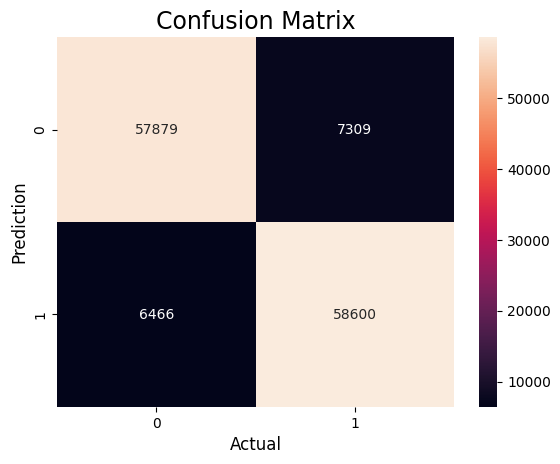

In [43]:
# Vizualizing the Confusion Matrix
Dt_actual    = np.array(Y_test)
Dt_predicted = np.array(Dt_Y_predicted)

#compute the confusion matrix.
Dt_cm = confusion_matrix(Dt_actual,Dt_predicted)

#Plot the confusion matrix.
sns.heatmap(Dt_cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [44]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None, 5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomizedSearchCV instance
randomized_search_Dt = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fitting the model to find the best parameters
randomized_search_Dt.fit(X_train,Y_train)

# Printing the best parameters and corresponding accuracy
print("Best Parameters:", randomized_search_Dt.best_params_)
print("Best Accuracy:", randomized_search_Dt.best_score_)

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
Best Accuracy: 0.8930815683651689


In [45]:
# Fitiing the Decision Tree Regressor model with best Hyperparameters
Dt_model = DecisionTreeClassifier(**randomized_search_Dt.best_params_)
Dt_model.fit(X_train,Y_train)

#Prediction of dependent variable B by using .predict method
Dt_model_Y_predicted = Dt_model.predict(X_test)

#evaluating scores
Dt_model_accuracy = accuracy_score(Y_test, Dt_model_Y_predicted)
Dt_model_precision = precision_score(Y_test, Dt_model_Y_predicted)
Dt_model_recall = recall_score(Y_test, Dt_model_Y_predicted)
Dt_model_f1 = f1_score(Y_test, Dt_model_Y_predicted)
Dt_model_conf_matrix = confusion_matrix(Y_test, Dt_model_Y_predicted)

print("Accuracy:", Dt_model_accuracy)
print("Precision:", Dt_model_precision)
print("Recall:", Dt_model_recall)
print("F1 Score:", Dt_model_f1)
print("Confusion Matrix:\n", Dt_model_conf_matrix)

Accuracy: 0.8962718995194006
Precision: 0.9021011745987177
Recall: 0.8888052131681677
F1 Score: 0.8954038382634143
Confusion Matrix:
 [[58912  6276]
 [ 7235 57831]]


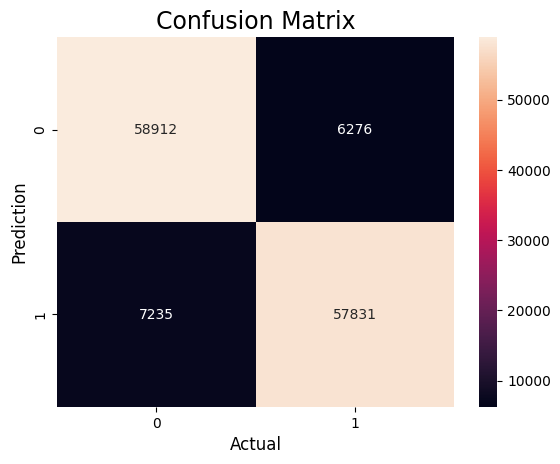

In [46]:
# Vizualizing the Confusion Matrix
Dt_model_actual    = np.array(Y_test)
Dt_model_predicted = np.array(Dt_model_Y_predicted)

#compute the confusion matrix.
Dt_model_cm = confusion_matrix(Dt_model_actual,Dt_model_predicted)

#Plot the confusion matrix.
sns.heatmap(Dt_model_cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I usede randomizedSearchCv because GridSearchCv takes a lot of time and RandomizedSearchCV picks random specified numbers and parameters from the paramater grid

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The scores have been increased compared to Logistic regression model

### ML Model - 3 Random forest classifier

In [47]:
#Fitting decision tree classifier model
Rf = RandomForestClassifier()
Rf.fit(X_train,Y_train)

# predicting for y test
Rf_Y_predicted = Rf.predict(X_test)

# evaluation of scores
Rf_accuracy = accuracy_score(Y_test, Rf_Y_predicted)
Rf_precision = precision_score(Y_test, Rf_Y_predicted)
Rf_recall = recall_score(Y_test, Rf_Y_predicted)
Rf_f1 = f1_score(Y_test, Rf_Y_predicted)
Rf_conf_matrix = confusion_matrix(Y_test, Rf_Y_predicted)

print("Accuracy:", Rf_accuracy)
print("Precision:", Rf_precision)
print("Recall:", Rf_recall)
print("F1 Score:", Rf_f1)
print("Confusion Matrix:\n", Rf_conf_matrix)

Accuracy: 0.9050470618944524
Precision: 0.9088666128731923
Recall: 0.9001782805151692
F1 Score: 0.9045015828893521
Confusion Matrix:
 [[59315  5873]
 [ 6495 58571]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used Random forest classifier model

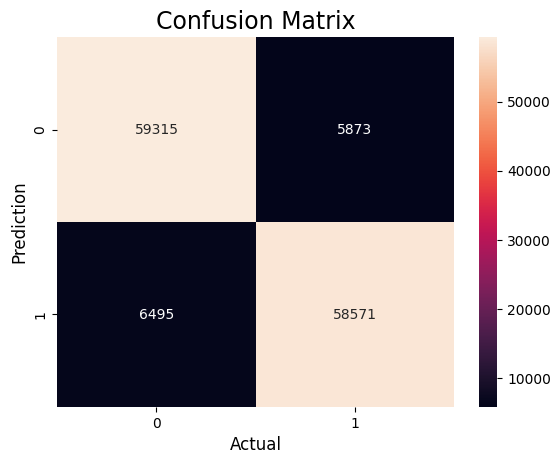

In [48]:
# Visualizing evaluation Metric Score chart
# Vizualizing the Confusion Matrix
Rf_actual    = np.array(Y_test)
Rf_predicted = np.array(Rf_Y_predicted)

#compute the confusion matrix.
Rf_cm = confusion_matrix(Rf_actual,Rf_predicted)

#Plot the confusion matrix.
sns.heatmap(Rf_cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### ML Model -4  K-Nearest Neighbours

In [51]:
classifier = KNeighborsClassifier(n_neighbors=5)
# Fitting the model
classifier.fit(X_train,Y_train)

#Prediction of dependent variable B by using .predict method
Classifier_Y_predicted = classifier.predict(X_test)

#evaluating scores
classifier_accuracy = accuracy_score(Y_test, Classifier_Y_predicted)
classifier_precision = precision_score(Y_test, Classifier_Y_predicted)
classifier_recall = recall_score(Y_test, Classifier_Y_predicted)
classifier_f1 = f1_score(Y_test, Classifier_Y_predicted)
classifier_conf_matrix = confusion_matrix(Y_test, Classifier_Y_predicted)

print("Accuracy:", classifier_accuracy)
print("Precision:", classifier_precision)
print("Recall:", classifier_recall)
print("F1 Score:", classifier_f1)
print("Confusion Matrix:\n", classifier_conf_matrix)


Accuracy: 0.8162743562577732
Precision: 0.7461787975630484
Recall: 0.9581194479451633
F1 Score: 0.8389710186861178
Confusion Matrix:
 [[43982 21206]
 [ 2725 62341]]


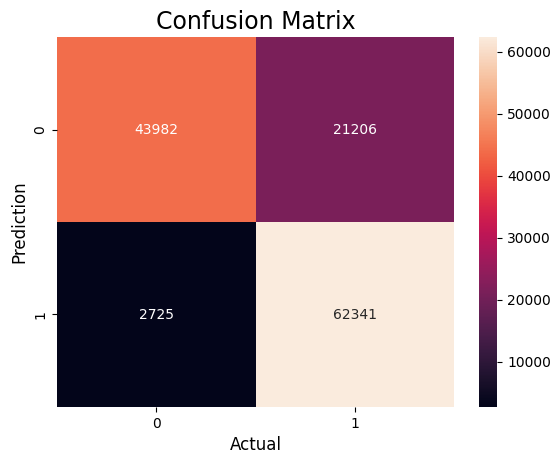

In [52]:
# Vizualizing the Confusion Matrix
classifier_actual    = np.array(Y_test)
classifier_predicted = np.array(Classifier_Y_predicted)

#compute the confusion matrix.
classifier_model_cm = confusion_matrix(classifier_actual,classifier_predicted)

#Plot the confusion matrix.
sns.heatmap(classifier_model_cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used F1 score because F1 scores finds the harmonic mean of precision score and recall score.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I used the Random forest model because the highest accuracy we get is from this modfel with the accuracy of 90%

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used Random forest classifier and the model creates multiple decision tree to predict the outcomes

In [53]:
# Creating a series that shows the feature Importance
feature_importance = pd.Series(Rf.feature_importances_ , index = [X_train.columns]).sort_values(ascending = True)
feature_importance

Driving_License_Yes       0.000224
Driving_License_No        0.000451
Vehicle_Age_> 2 Years     0.018387
Vehicle_Age_1-2 Year      0.023000
Gender_Female             0.045079
Gender_Male               0.046630
Vehicle_Damage_Yes        0.049198
Vehicle_Age_< 1 Year      0.053662
Policy_Sales_Channel      0.064507
Previously_Insured_No     0.071410
Region_Code               0.082238
Age                       0.084991
Previously_Insured_Yes    0.091173
Annual_Premium            0.098324
Vintage                   0.107817
Vehicle_Damage_No         0.162911
dtype: float64

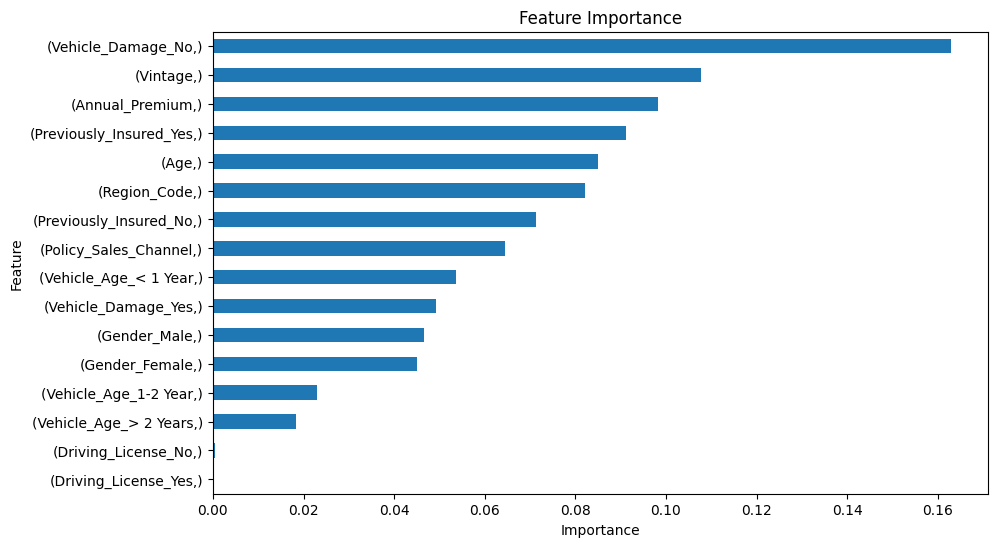

In [54]:
# plot figure
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# **Conclusion**

I have analyzed the data and fit a macchine learning model(Random Forest Classifier) that will predict the customers that has intrest in vehicle insurance or no with 90% accuracy.
The key findings and insights from this project are as follows:-
* The data contains around 54.1% of males and 45.9% of females. The highest response is from the Male category (The company should focus on female customers)
* The customers in the data states 99.8% of its customers have their driving license so the company have best possible oppurtunity to sell thier vehicle insurance
*There are lots of customers with age of 20-32 and customers with age 20-32 have very few response compared to age group of 33-55. The company should focus more on the customers of age group 20-32
* The data states there are lot of customers with vehicle of 1-2 yeard old and even the response is high from this category. The customers with vehicle age less than 1 year old have less reponse for vehicle insurance.
* The highest response if from the custtomers whose vehicle have already been damaged
* Most numer of premium falls under 5000-100000 and even there are some people who pay premium more than 100000

Suggestions to the company:-
* The company should focus on its female customers as the response from female category is lesser compared to male category
* The company need to focus on the customers with age group of 20-32 because the highest number of customers are from this age group but the response is low compared to the age group of 33-55.
* The customers with vehicle age of less than a year are less intrested in vehicle insurance because there can be customers who already have insurance taken from dealer itself. The company needs to collaborate with various dealers to sell most amount of vehicle insurance
* The least amount of response is from the customers whose vehicles has not been damaged earlier. The company need to spread awareness and the benefits of vehicle insurance to its customers in order to get more response from these customers



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***